In [1]:
!git clone --branch colab https://github.com/fizmat/hopfield-tracking /content/hopfield-tracking

Cloning into '/content/hopfield-tracking'...
remote: Enumerating objects: 1949, done.
remote: Counting objects: 100% (1949/1949), done.
remote: Compressing objects: 100% (612/612), done.
remote: Total 1949 (delta 1360), reused 1899 (delta 1317), pack-reused 0
Receiving objects: 100% (1949/1949), 16.45 MiB | 9.15 MiB/s, done.
Resolving deltas: 100% (1360/1360), done.


In [2]:
!pip install -r /content/hopfield-tracking/requirements-colab.txt

  Cloning https://github.com/LAL/trackml-library (to revision master) to /tmp/pip-install-xyctc6k5/trackml_b46ffb9e6a69478fabdef9d9deffc927
  Running command git clone --filter=blob:none --quiet https://github.com/LAL/trackml-library /tmp/pip-install-xyctc6k5/trackml_b46ffb9e6a69478fabdef9d9deffc927
  Resolved https://github.com/LAL/trackml-library to commit 53a165e15a2c885f54c2bef1bd1ed53db6ed9648
  Preparing metadata (setup.py) ... done
  Created wheel for trackml: filename=trackml-3-py2.py3-none-any.whl size=13500 sha256=01dffc3e3a0af4b25abd770fd11653f9ed3b2be8a2a5730e820a11ebdf0c37d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-gwkw0q32/wheels/ba/5b/12/14ebc487d5056967e435b7709669dbffb633424e6c39d5a827
Successfully built trackml


In [3]:
!pytest /content/hopfield-tracking

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.3.0
rootdir: /content/hopfield-tracking
configfile: tox.ini
plugins: anyio-3.7.1
collected 62 items / 8 deselected / 54 selected                                                    

hopfield-tracking/datasets/test_bman.py ...                                                  [  5%]
hopfield-tracking/datasets/test_datasets.py .......                                          [ 18%]
hopfield-tracking/datasets/test_simple.py ........                                           [ 33%]
hopfield-tracking/datasets/test_spdsim.py ..                                                 [ 37%]
hopfield-tracking/datasets/test_trackml.py ...                                               [ 42%]
hopfield-tracking/hopfield/test_iterate.py ...                                               [ 48%]
hopfield-tracking/hopfield/energy/test_cross.py .....       

In [4]:
!cd /content/hopfield-tracking/data/trackml && wget https://drive.uni-dubna.ru/index.php/s/qFKLz9Z6Yiw9SN3/download/blacklist_training.zip
!cd /content/hopfield-tracking/data/trackml && wget https://drive.uni-dubna.ru/index.php/s/JybcAq99pmTGwoG/download/train_sample.zip
!cd /content/hopfield-tracking/data/bman && wget https://drive.uni-dubna.ru/index.php/s/zqAcQt8NY35ewdS/download/simdata_ArPb_3.2AGeV_mb_1.zip

--2024-01-15 14:27:23--  https://drive.uni-dubna.ru/index.php/s/qFKLz9Z6Yiw9SN3/download/blacklist_training.zip
Resolving drive.uni-dubna.ru (drive.uni-dubna.ru)... 159.93.167.201
Connecting to drive.uni-dubna.ru (drive.uni-dubna.ru)|159.93.167.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11419812 (11M) [application/zip]
Saving to: ‘blacklist_training.zip’

blacklist_training. 100%[===================>]  10.89M  5.86MB/s    in 1.9s    

2024-01-15 14:27:26 (5.86 MB/s) - ‘blacklist_training.zip’ saved [11419812/11419812]

--2024-01-15 14:27:26--  https://drive.uni-dubna.ru/index.php/s/JybcAq99pmTGwoG/download/train_sample.zip
Resolving drive.uni-dubna.ru (drive.uni-dubna.ru)... 159.93.167.201
Connecting to drive.uni-dubna.ru (drive.uni-dubna.ru)|159.93.167.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 903185165 (861M) [application/zip]
Saving to: ‘train_sample.zip’

train_sample.zip    100%[===================>] 861.34M  9

In [5]:
cd /content/hopfield-tracking

/content/hopfield-tracking


In [6]:
!pip install vispy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:00


In [7]:
!pip install jupyter_rfb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [8]:
!pip install glfw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 2.8 MB/s eta 0:00:00


In [9]:
import vispy
# selecting sub-backend behind jupyter_rfb:
# 1) pyglfw has high priority if present
# 2) to use any other backend, install then designate as default
# 4) use jupyter_rfb, it then selects the sub-backend according to config
# 5) enable jupyterlab extensions for interactive widget provided by jupyter_rfb

# only needed in jhub2, jhub and jlab-hpc can't run opengl at all, locally auto-selected backend is OK
vispy.config.update(default_backend='egl')
vispy.use('jupyter_rfb')

In [11]:
from segment.candidate import gen_seg_layered
from segment.track import gen_seg_track_layered, gen_seg_track_sequential
from tracking.plot import plot_event, plot_seg_diff
from vispy.scene import SceneCanvas
from datasets import get_hits

canvas = SceneCanvas(bgcolor='white', size=(1000, 1500))
grid = canvas.central_widget.add_grid()

event = get_hits('spdsim', 1)
#grid.add_widget(plot_seg_diff(event, gen_seg_track_layered(event), gen_seg_track_sequential(event)).central_widget)
grid.add_widget(plot_event(event, gen_seg_track_sequential(event)).central_widget)
#canvas

RFBOutputContext()

/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


RFBOutputContext()

/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


In [12]:
event

,x,y,z,layer,track,event_id
0,-169.376167,210.274913,-157.725137,1,0,0
1,-183.073776,221.090086,-165.593520,2,0,0
2,-196.920053,231.779103,-173.724348,3,0,0
3,-211.231867,241.949743,-181.749220,4,0,0
4,-225.846369,251.784462,-189.764737,5,0,0
...,...,...,...,...,...,...
91,332.930991,650.333345,-1410.078734,27,-1,0
92,-183.014275,601.126133,-809.731748,21,-1,0
93,-371.872417,-19.682516,-296.358415,6,-1,0
94,-559.984441,616.625697,-248.372955,33,-1,0


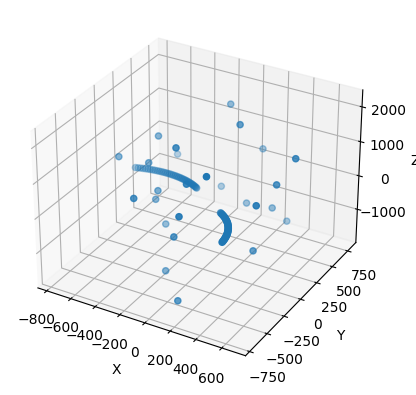

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_event(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = df['x']
    y = df['y']
    z = df['z']

    ax.scatter(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

draw_event(event)